Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

     ---------------------------------------- 83.6/83.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB 1.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=24b2052020fad63d679751ab42a53718c2e932cb5366ae0186e41ca635850e91
  Stored in directory: c:\users\ragha\appdata\local\pip\cache\wheels\b2\3d\88\839f363f3ce6b71785b8a95627cd52cb5359e54aba76a7ab76
Successfully built kaggle


Importing the Dog vs Cat Dataset from Kaggle

In [8]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:01<25:04, 565kB/s]
  0%|          | 2.00M/812M [00:02<12:57, 1.09MB/s]
  0%|          | 3.00M/812M [00:02<08:53, 1.59MB/s]
  0%|          | 4.00M/812M [00:02<06:43, 2.10MB/s]
  1%|          | 5.00M/812M [00:03<05:40, 2.49MB/s]
  1%|          | 6.00M/812M [00:03<05:15, 2.68MB/s]
  1%|          | 7.00M/812M [00:03<04:56, 2.85MB/s]
  1%|          | 8.00M/812M [00:03<04:29, 3.13MB/s]
  1%|1         | 9.00M/812M [00:04<04:16, 3.28MB/s]
  1%|1         | 10.0M/812M [00:04<04:07, 3.40MB/s]
  1%|1         | 11.0M/812M [00:04<04:09, 3.37MB/s]
  1%|1         | 12.0M/812M [00:05<04:02, 3.46MB/s]
  2%|1         | 13.0M/812M [00:05<03:57, 3.53MB/s]
  2%|1         | 14.0M/812M [00:05<03:56, 3.54MB/s]
  2%|1         | 15.0M/812M [00:06<04:08, 3.36MB/s]
  2%|1         | 16.0M/812M [00:06<04:19, 3.22MB/s]
  2%|2         | 17.0M/812M [00:06<04:17, 3.24MB/s]
  2%|2         | 18.0M/812M [00:07<04:07, 3.36MB/s]
  2%|2         | 19.0

In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [14]:
file_names = os.listdir('train/')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the Dependencies

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# from google.colab.patches import cv2_imshow 

Displaying the images of dogs and cats

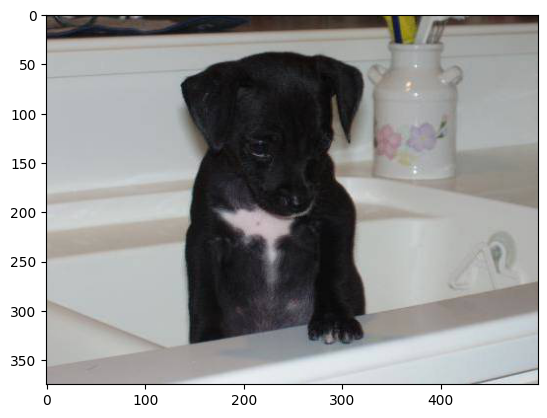

In [17]:
# display dog image
img = mpimg.imread('train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

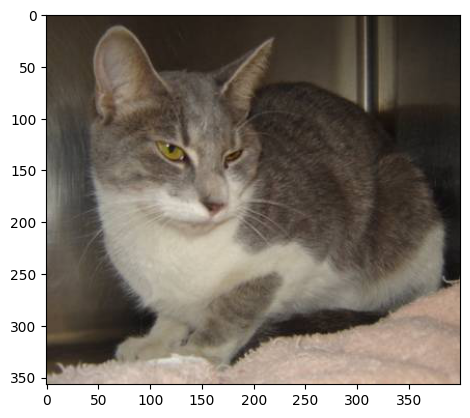

In [19]:
# display cat image
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [21]:
file_names = os.listdir('train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



cat
cat
cat
cat
cat


In [22]:
file_names = os.listdir('train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [23]:
#creating a directory for resized images
os.mkdir('image resized')

In [27]:
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(25000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

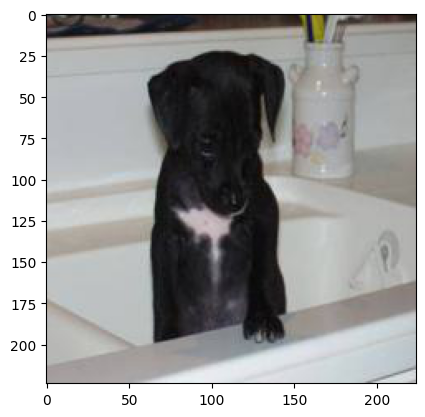

In [28]:
# display resized dog image
img = mpimg.imread('image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

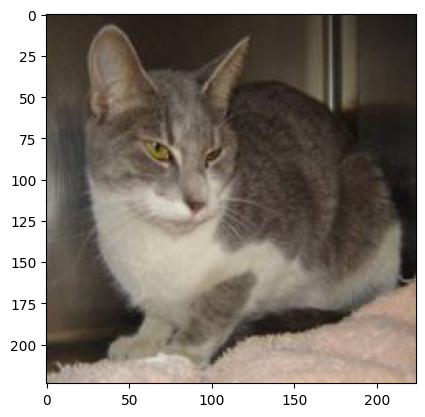

In [29]:
# display resized cat image
img = mpimg.imread('image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [30]:
# creaing a for loop to assign labels
filenames = os.listdir('image resized/')


labels = []

for i in range(25000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

In [ ]:
print(labels[0:5])
print(len(labels))

In [31]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[12500 12500]


Converting all the resized images to numpy arrays

In [32]:
import cv2
import glob

In [37]:
image_directory = 'image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [38]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [169 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [167 196 200]
   [164 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [165 194 198]
   [168 200

In [39]:
type(dog_cat_images)

numpy.ndarray

In [40]:
print(dog_cat_images.shape)

(25000, 224, 224, 3)


In [41]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


1600 --> training images

400 --> test images

In [44]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [45]:
print(X_train_scaled)

[[[[0.16862745 0.24313725 0.37254902]
   [0.1372549  0.21176471 0.34117647]
   [0.11372549 0.19215686 0.32941176]
   ...
   [0.69411765 0.71372549 0.70980392]
   [0.69019608 0.70980392 0.70588235]
   [0.67843137 0.69803922 0.69411765]]

  [[0.12941176 0.2        0.32156863]
   [0.11764706 0.19607843 0.31764706]
   [0.10980392 0.18431373 0.31372549]
   ...
   [0.70196078 0.72156863 0.71764706]
   [0.70196078 0.72156863 0.71764706]
   [0.68627451 0.70588235 0.70196078]]

  [[0.15686275 0.21960784 0.33333333]
   [0.16078431 0.23137255 0.34509804]
   [0.14509804 0.21568627 0.3372549 ]
   ...
   [0.70196078 0.72156863 0.71764706]
   [0.70196078 0.72156863 0.71764706]
   [0.69019608 0.70980392 0.70588235]]

  ...

  [[0.54901961 0.59607843 0.61960784]
   [0.50588235 0.55294118 0.57647059]
   [0.45882353 0.50588235 0.52941176]
   ...
   [0.62745098 0.63137255 0.59607843]
   [0.63529412 0.63921569 0.6       ]
   [0.63529412 0.63921569 0.6       ]]

  [[0.37647059 0.41960784 0.45098039]
   [0.3

**Building the Neural Network**

In [47]:
pip install tensorflow_hub

     ---------------------------------------- 90.3/90.3 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
import tensorflow as tf
import tensorflow_hub as hub

In [49]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [50]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [51]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

**Predictive System**

Path of the image to be predicted: /content/dog.jpg


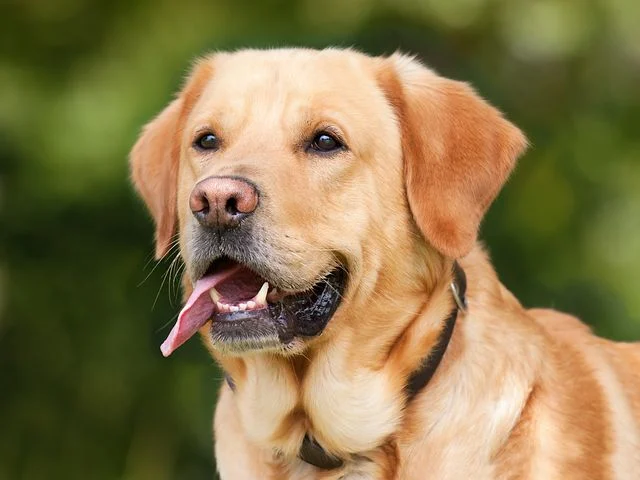

[[-4.6012597  3.784018 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


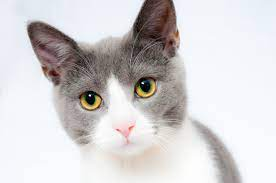

[[ 4.302739 -4.893738]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')